# main goal of this notebook is to learn how the neural network works and to make a very basic neural network 
not to train a best model or accurate model this is just for learning

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [2]:
df = pd.read_csv('/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape

(10000, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.duplicated().sum()

0

In [7]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [8]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [9]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [10]:
df.drop(columns = ['RowNumber', 'CustomerId', 'Surname'], inplace = True)

In [11]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
df = pd.get_dummies(df, columns = ['Geography', 'Gender'], drop_first = True)

In [13]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,0,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,1,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,True,False,True


In [14]:
X = df.drop(columns = ['Exited'])
y = df['Exited']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [15]:
X_train.shape

(8000, 11)

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [17]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

2025-05-05 16:46:14.822299: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746463575.153864      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746463575.242239      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [18]:
model = Sequential()


model.add(Input(shape=(11,)))
model.add(Dense(11, activation = 'relu'))
model.add(Dense(11, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

2025-05-05 16:46:31.663749: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              12 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
model.compile(loss = 'binary_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

here validation_split doing is it is splitting the 8000 training data with 20% saperate and model will run on 8000 - these 20% of data along with that it will test on these 20% data and will tell the accuracy 

this is also a good method to validate the performance of our model

In [21]:
history = model.fit(X_train_scaled, y_train, epochs = 100, validation_split = 0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6542 - loss: 0.6328 - val_accuracy: 0.7975 - val_loss: 0.4640
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8020 - loss: 0.4473 - val_accuracy: 0.8069 - val_loss: 0.4356
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8185 - loss: 0.4264 - val_accuracy: 0.8087 - val_loss: 0.4197
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8317 - loss: 0.4138 - val_accuracy: 0.8213 - val_loss: 0.4070
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8423 - loss: 0.3935 - val_accuracy: 0.8394 - val_loss: 0.3946
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8468 - loss: 0.3885 - val_accuracy: 0.8413 - val_loss: 0.3825
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8462 - loss: 0.3775 - val_accuracy: 0.8487 - val_loss: 0.3727
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8552 - loss: 0.3613 - val_accu

In [22]:
model.layers[1].get_weights()

[array([[-1.07637525e-01,  5.87192103e-02, -2.91602284e-01,
         -5.00309527e-01,  2.47138277e-01,  4.52014863e-01,
          6.39702499e-01,  9.88470539e-02,  5.05315959e-01,
         -5.37887394e-01, -5.83730303e-02],
        [ 4.53110278e-01,  5.20956397e-01, -4.94364975e-03,
          6.56404972e-01,  6.67030990e-01, -1.32767409e-01,
         -5.53786755e-01, -1.93319589e-01,  2.29693383e-01,
          3.86922389e-01, -4.70107079e-01],
        [-8.59688878e-01, -1.71505705e-01, -3.05387042e-02,
         -2.79080383e-02, -1.05337657e-01, -5.55464566e-01,
         -4.09103453e-01,  6.38686568e-02, -2.56630540e-01,
          1.90853417e-01, -1.97257325e-01],
        [ 2.20525503e-01, -6.91620886e-01, -6.03477716e-01,
          1.82667777e-01,  1.50224715e-01,  2.12622881e-01,
          5.27261905e-02,  6.77350610e-02,  1.73304826e-01,
          5.54638982e-01,  4.13927227e-01],
        [ 2.04777047e-01, -9.28218067e-02, -2.31825069e-01,
          6.64372370e-02, -5.19019179e-02,  

In [23]:
model.layers[0].get_weights()

[array([[ 3.42333972e-01, -2.37657037e-02, -6.93817258e-01,
         -7.04301178e-01, -7.71292001e-02, -1.04220599e-01,
         -4.99302298e-02,  9.30063128e-02, -1.17158487e-01,
          9.03852433e-02, -8.44642669e-02],
        [-5.82711160e-01,  1.04188585e+00,  1.02335787e+00,
         -1.73232742e-02, -2.03512594e-01,  3.04876447e-01,
         -1.09932318e-01,  8.47491860e-01,  4.09486949e-01,
         -3.85910124e-01, -8.35857093e-01],
        [-9.87725183e-02, -1.11729108e-01, -2.58730110e-02,
          2.70138890e-01, -1.47335887e-01,  2.78839357e-02,
          1.41741410e-01,  1.98787600e-01, -6.17183745e-02,
         -3.14699829e-01, -1.86301291e-01],
        [ 6.47007883e-01,  3.46001312e-02,  5.51490067e-03,
         -1.06390655e-01, -2.83812672e-01, -3.37754101e-01,
          5.06624766e-02, -8.05439651e-02,  3.38473678e-01,
         -2.19282880e-01, -1.29584232e-02],
        [ 2.44128495e-01, -2.42980465e-01, -2.01682419e-01,
         -6.58430234e-02,  3.44147563e-01, -

In [24]:
y_log = model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [25]:
y_log 

array([[0.02226767],
       [0.11540251],
       [0.07135888],
       ...,
       [0.01691032],
       [0.05772566],
       [0.44336897]], dtype=float32)

In [26]:
y_pred = np.where(y_log>0.5, 1, 0)

In [27]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.866

to increase the accuracy what we can do

1 increase the no of epochs

2 in the hidden layer we can keep the actiovation function as relu

3 inc the no.of nodes in one layer

4 inc the no fo layers

we have to experimenjt around all of these , basically means hit and trial

In [28]:
history.history

# dict of our model

{'accuracy': [0.7487499713897705,
  0.8006250262260437,
  0.8174999952316284,
  0.8329687714576721,
  0.8370312452316284,
  0.8428124785423279,
  0.84765625,
  0.8517187237739563,
  0.85546875,
  0.8545312285423279,
  0.8565624952316284,
  0.8595312237739563,
  0.8584374785423279,
  0.858593761920929,
  0.8600000143051147,
  0.8626562356948853,
  0.8606250286102295,
  0.8609374761581421,
  0.8631250262260437,
  0.8618749976158142,
  0.8617187738418579,
  0.8629687428474426,
  0.8617187738418579,
  0.8626562356948853,
  0.8621875047683716,
  0.8631250262260437,
  0.862500011920929,
  0.8646875023841858,
  0.8629687428474426,
  0.8631250262260437,
  0.8635937571525574,
  0.8634374737739563,
  0.8651562333106995,
  0.8656250238418579,
  0.8642187714576721,
  0.8645312786102295,
  0.8659374713897705,
  0.8643749952316284,
  0.8650000095367432,
  0.8657812476158142,
  0.8665624856948853,
  0.866406261920929,
  0.8646875023841858,
  0.8667187690734863,
  0.8668749928474426,
  0.8660937547683

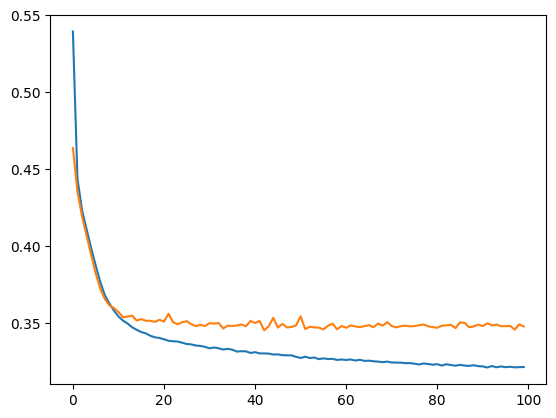

In [29]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

# from the difference bwtn these plots we can get the idea of the overfitting of data
# from the gap btwn these plots

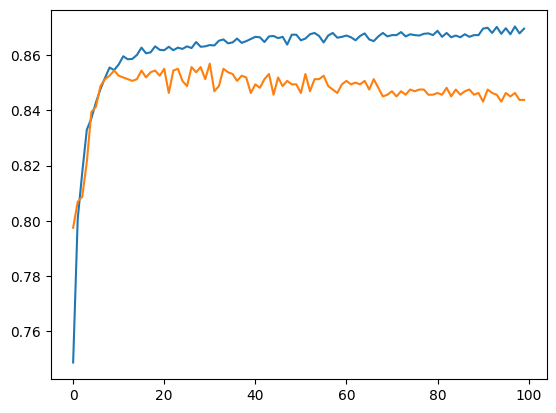

In [30]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])